# Contextual Bandit Problem: Identifying Right AD Banner Using MAB



Let us say you are running a website and you have five different banners for the same ad and you want to know which banner attracts the user? We model this problem statement as a bandit problem. Let us say these five banners are five bandits and we assign reward 1 if the user clicks the ad and reward 0 if the user does not click the ad.

In a normal A/B testing, we perform complete exploration of all these five banners alone before deciding which banner is the best. But that will cost us lot of regret. Instead, we will use good exploration strategy for deciding which banner will give us most rewards (most clicks)

 First, let us import necessary libraries

In [1]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
env = gym.make("BanditTenArmedGaussian-v0")

/Users/victorius/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let us simulate a dataset with 5*10000 as shape where the column is the ad banner type and rows are either 0 or 1 i.e whether the ad has been clicked or not clicked by the user respectively



In [2]:
df = pd.DataFrame()
df['Banner_type_0'] = np.random.randint(0,2,100000)
df['Banner_type_1'] = np.random.randint(0,2,100000)
df['Banner_type_2'] = np.random.randint(0,2,100000)
df['Banner_type_3'] = np.random.randint(0,2,100000)
df['Banner_type_4'] = np.random.randint(0,2,100000)

In [3]:
df.head(10)

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,0,1,1,1
1,0,1,1,1,1
2,0,1,0,1,0
3,0,0,1,1,0
4,1,1,0,0,0
5,1,1,0,1,1
6,1,0,0,0,0
7,0,1,0,1,1
8,1,1,1,1,0
9,0,1,1,1,0


In [4]:
df.shape

(100000, 5)

First, let us initialize necessary variables

In [5]:
# number of banners
num_banner = 5

# number of iterations
no_of_iterations = 100000

# list for storing banners which are selected
banner_selected = []

# count number of times the banner was selected
count = np.zeros(num_banner)

# Q value of the banner
Q = np.zeros(num_banner)

# sum of rewards obtained by the banner
sum_rewards = np.zeros(num_banner)

 Now we define the epsilon greedy policy

In [6]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_banner)
    else:
        action = np.argmax(Q)
    
    return action


In [7]:
for i in range(no_of_iterations):
    
    # select the banner using epsilon greedy policy
    banner = epsilon_greedy(0.5)
        
    # get the reward
    reward = df.values[i, banner]
    
    # update the selected banner count
    count[banner] += 1
    
    # sum the rewards obtained by that banner
    sum_rewards[banner]+=reward
    
    # calculate the Q value of the banner
    Q[banner] = sum_rewards[banner]/count[banner]
    
    banner_selected.append(banner)

We can plot and see which banner type gives us most clicks(rewards)

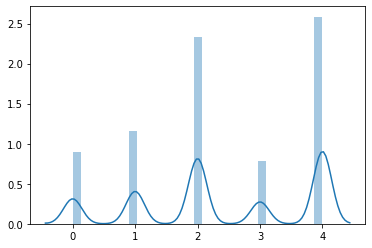

In [8]:
sns.distplot(banner_selected)